In [45]:
# %matplotlib widget 
%reload_ext autoreload
%autoreload 2

import numpy as np
from functools import partial
# from pdb import set_trace

from update_2d import run_exp #, update_w
from plot_custom import plot_all #, plot_3d
from landscape_loss import landscape

from pdb import set_trace
# w_rng = np.random.default_rng()

In [46]:

def print_str():
    legend = ['SGD', 'NGD', 'sNGD']
    for q in qs:
        legend.append('q = '+str(q))
    print('w0 = ', w0, ' lr = ', lrs, ' noise = ', eps, ' seed = ', seed)
    
    return legend


def run_all(fnc = None, eps=0.1, iter = 100, idx = 0, OED_solver = None, rotate=False):
    if fnc is None:
        fnc = partial(landscape, freq = None, amp = None, py = np, eps = eps, seed = seed)

    legend = print_str()
    l_alls, w_alls, w_range = run_exp(fnc, w0, qs, lrs, dampings = dampings, iter = iter, OED_solver = OED_solver)
    plot_all (fnc, l_alls, w_alls, w_range, legend, q = qs[idx], damping = dampings[idx], rotate=rotate) # plot_type = 'imshow')
    return l_alls, w_alls

# Quadratic loss

w0 =  [  0. -10.]  lr =  [0.0256 0.24   0.12  ]  noise =  (0.1,)  seed =  42


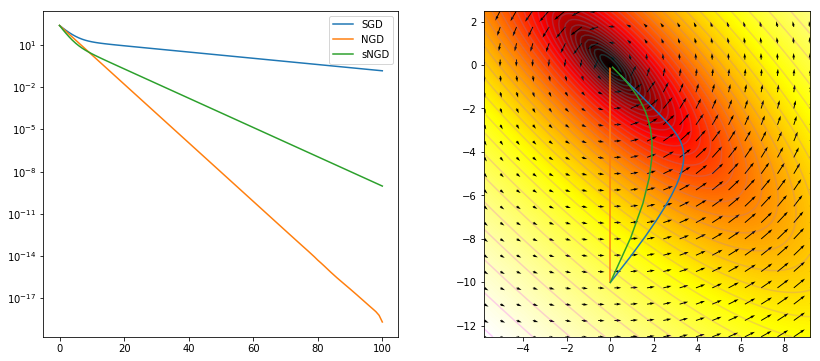

In [62]:

def shallownet_2d(w, A = np.array([[1,2],[2,1]]) ):
    f = A @ w             # input-output map
    j = A                 # Jacobian of map
    err = f - 0     # target = 0
    loss = (err ** 2 /2).sum(axis=0)
#     set_trace()
    if len(w.shape)==2:
        j = np.repeat(j.reshape(2,2,-1), w.shape[1], axis=2)
    return loss, err, j 

eps = 0.1, 
lrs = np.array([0.0016*4, 0.06, 0.03])*4
dampings = [0, 0, 0]
w0 = np.array([0,-10.0]) 
qs = [0, 1.0, 0.5]
seed = 42

l_alls, w_alls = run_all(fnc = shallownet_2d, eps=eps, iter = 100, idx = 1, OED_solver = 'odeint', rotate = True)

#  w_all.shape
# (101, 2)

# Play time!!

In [7]:
from fastai.vision import plt

seed = 6107 
eps = 0.1
fnc = partial(landscape, freq = None, amp = None, py = np, eps = eps, seed = seed)
w_range = [0,1]

x_grid = np.linspace(0, 10, 31)
fig = plt.figure(figsize=(8,8))
# plot_3d(fig, fnc, x_grid)

# np.einsum('ijk,jlk->ilk',array(z_sc),array(sc_y))

<Figure size 576x576 with 0 Axes>

w0 =  [7.094135 4.134471]  lr =  [0.0004 0.0025 0.0075]  noise =  0.1  seed =  6107


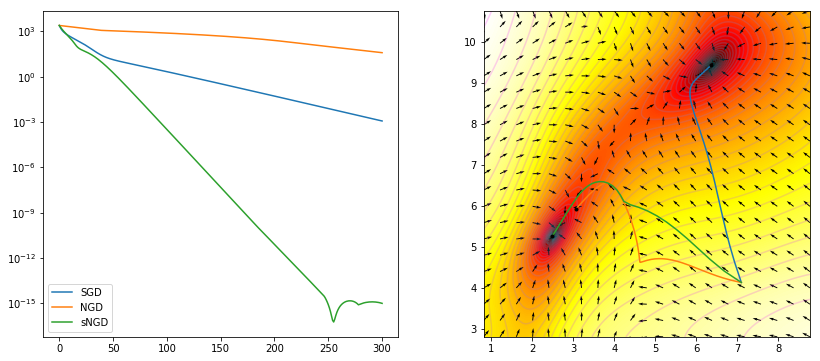

In [44]:
seed = 6107 #int(1e5*np.random.rand(1))
w0 = np.array([7.094135, 4.134471])
eps = 0.1

qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.0016, 0.01, 0.03])/4
dampings = [0, 3, 0.01]

l, w = run_all(iter = 300, idx = 2, OED_solver = 'odeint', rotate=False)


w0 =  [7.094135 4.134471]  lr =  [0.0004 0.0025 0.0075]  noise =  0.1  seed =  6107


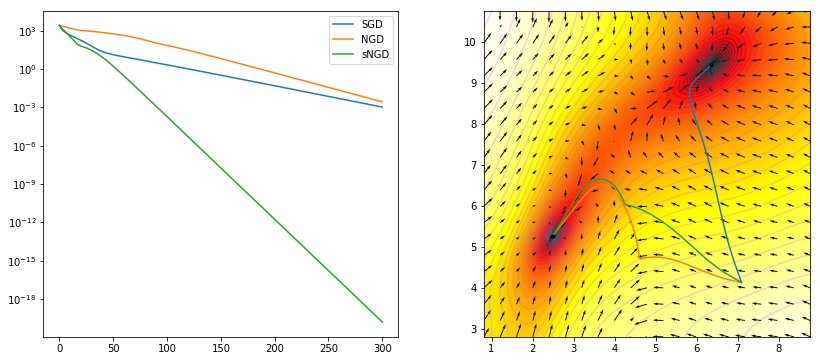

In [9]:
seed = 6107 #int(1e5*np.random.rand(1))
w0 = np.array([7.094135, 4.134471])
eps = 0.1

qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.0016, 0.01, 0.03])/4
dampings = [0, 10, 0.01]

l, w = run_all(iter = 300, idx = 1, OED_solver = None)


w0 =  [7.1 4.7]  lr =  [0.     0.0005]  noise =  0.1  seed =  6107


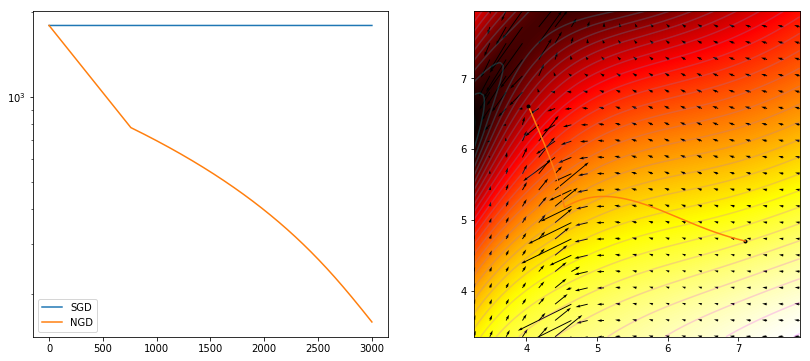

In [10]:
seed = 6107 #int(1e5*np.random.rand(1)) #
w0 = np.array([7.1, 4.7]) 
eps = 0.1

qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0, 0.005])/10
dampings = [0, 0.1]

l_all, w_all = run_all(iter = 3000, idx=1, OED_solver = 'odeint')

## hmm

w0 =  [19.8   1.89]  lr =  [0.0002   0.000625 0.00375 ]  noise =  0.1  seed =  12216


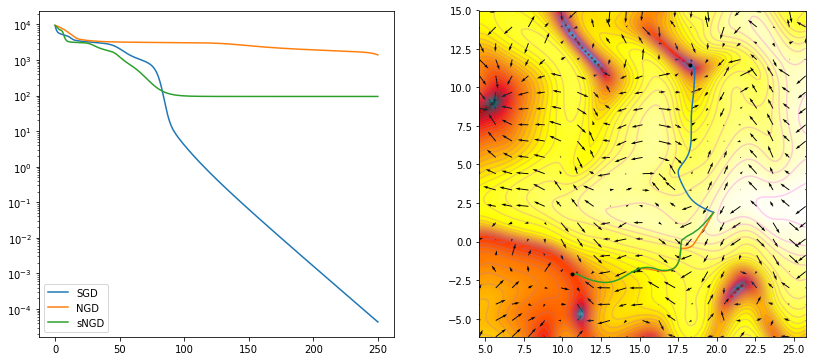

In [11]:
seed = 12216
np.random.randn(3)
w0 = np.array([19.8,  1.89]) 
eps = 0.1

qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.0016, 0.01/2, 0.03])/4/2
dampings = [0, 50, 0.0001]


# run_all(iter = 300)

l_all, w_all = run_all(iter = 250, idx=1, OED_solver = 'odeint')

w0 =  [19.8   1.89]  lr =  [0.0002   0.000625 0.0025  ]  noise =  0.1  seed =  12216


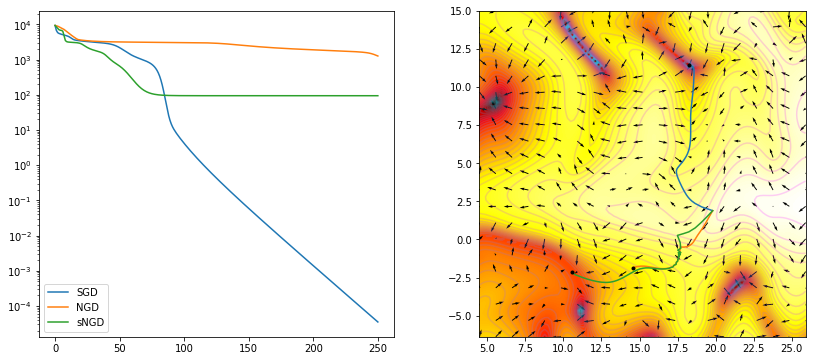

In [12]:
seed = 12216
np.random.randn(3)
w0 = np.array([19.8,  1.89]) 
eps = 0.1

qs = [0.0, 1.0, 0.45]; 
lrs = np.array([0.0016, 0.01/2, 0.02])/4/2
dampings = [0, 50, 1]


# run_all(iter = 300)

l_all, w_all = run_all(iter = 250, idx=2)

w0 =  [16.39411   0.187047]  lr =  [8.0e-05 7.5e-04 1.0e-03]  noise =  0.1  seed =  2355


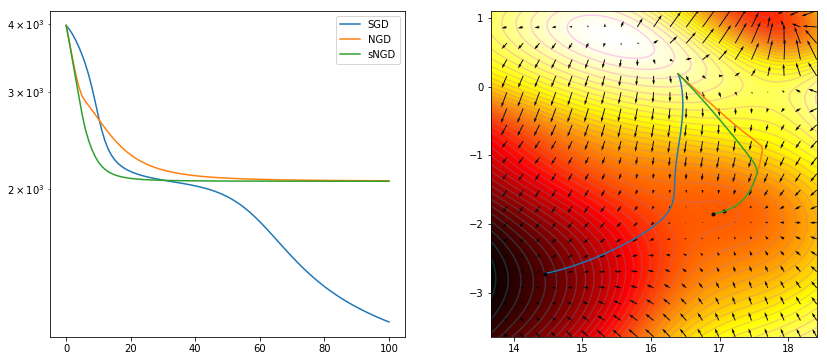

In [13]:
seed = 2355;
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.0016, 0.015, 0.02])/10/2; 
eps = 0.1;
# dampings = [0, 300, 15*4]
dampings = [0, 100, 15*1]


np.random.randn(3)
w0 = np.array([16.21833723,  0.08197838]) + 0.1 * np.random.randn(2)

l_alls, w_alls = run_all(iter = 100, idx = 0)

# print(w_alls[2][:,-3:-1])

w0 =  [17.090013 -9.730281]  lr =  [0.0004 0.015  0.015 ]  noise =  0.1  seed =  12125


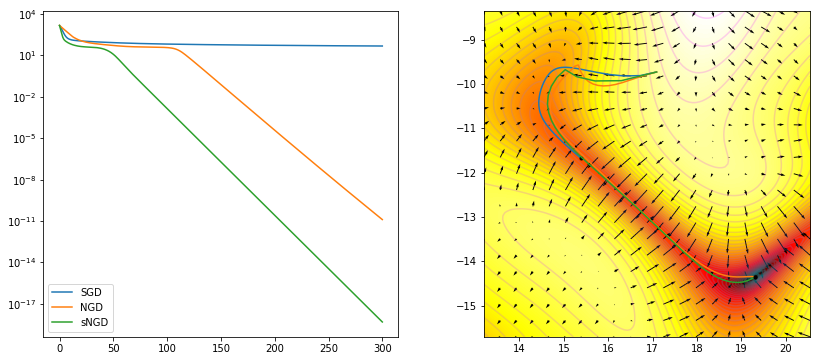

In [14]:
seed = 12125
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.0016, 0.06, 0.06])/4
dampings = [0., 4., 0.]

w0 = np.array([17.09001307, -9.73028108]) + 0 * np.random.randn(2)

l, w = run_all(iter = 300)

w0 =  [39.12839  32.231853]  lr =  [5.0e-05 5.0e-04 2.5e-03]  noise =  0.1  seed =  27589


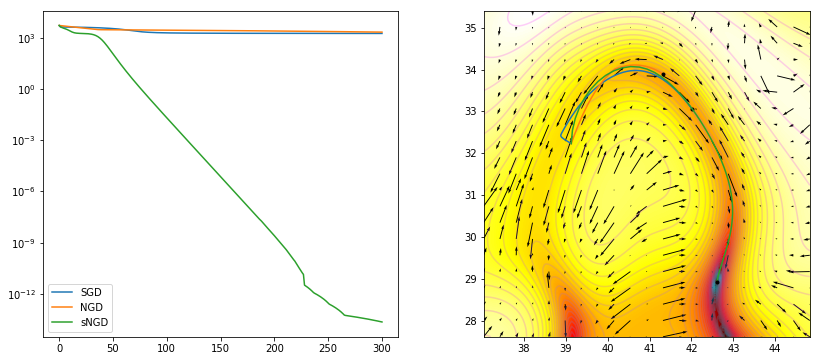

In [15]:
qs = [0.0, 1.0, 0.45]; lrs = np.array([0.0016/8, 0.01/5, 0.01])/4; momentums = None
eps = 0.1
seed = 27589
w0 = np.array([39.1283903, 32.23185338]) + 0 * np.random.randn(2)
# w0 = np.array([37.91283903, 32.23185338]) + 0 * np.random.randn(2)

# dampings = [0., 460., 10]
dampings = [0., 16., 0.01]

l, w = run_all(iter = 300, idx = 1, OED_solver = 'odeint')

w0 =  [39.12839  32.231853]  lr =  [5.0e-05 5.0e-04 2.5e-03]  noise =  0.1  seed =  27589


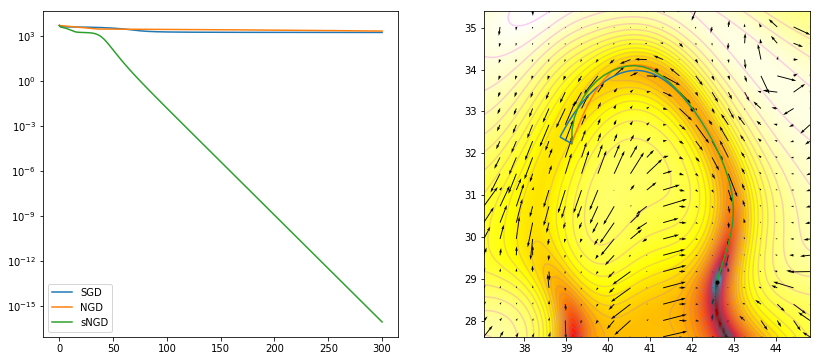

In [16]:
qs = [0.0, 1.0, 0.45]; lrs = np.array([0.0016/8, 0.01/5, 0.01])/4; momentums = None
eps = 0.1
seed = 27589
w0 = np.array([39.1283903, 32.23185338]) + 0 * np.random.randn(2)
# w0 = np.array([37.91283903, 32.23185338]) + 0 * np.random.randn(2)

# dampings = [0., 460., 10]
dampings = [0., 16., 0]

l, w = run_all(iter = 300, idx = 1)

w0 =  [39.12839  32.231853]  lr =  [5.0e-05 5.0e-04 2.5e-03]  noise =  0.1  seed =  27589


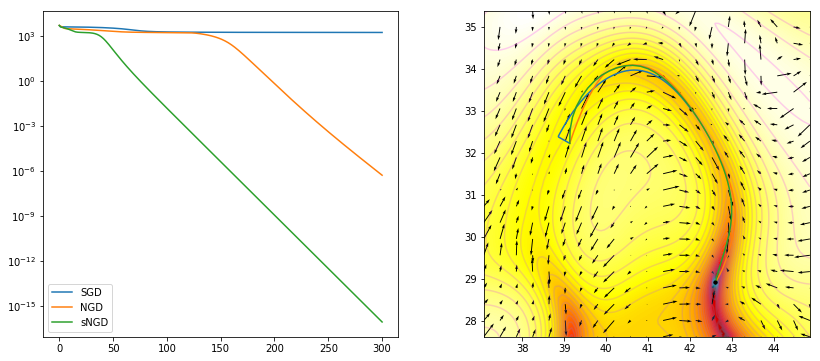

In [17]:
qs = [0.0, 1.0, 0.45]; lrs = np.array([0.0016/8, 0.01/5, 0.01])/4; momentums = None
eps = 0.1
seed = 27589
w0 = np.array([39.1283903, 32.23185338]) + 0 * np.random.randn(2)
# w0 = np.array([37.91283903, 32.23185338]) + 0 * np.random.randn(2)

# dampings = [0., 460., 10]
dampings = [0., 160., 0]

l, w = run_all(iter = 300, idx = 1)

w0 =  [-3.078412 22.187199]  lr =  [0.00025 0.0025  0.005  ]  noise =  0.1  seed =  79320


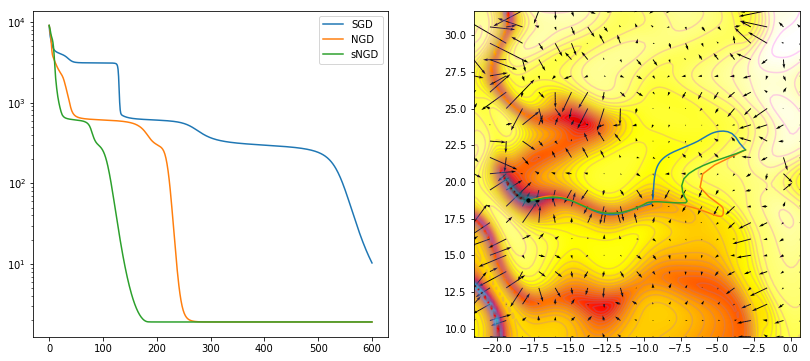

In [18]:
legend = ['SGD', 'NGD', 'sNGD']; 
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.001, 0.01, 0.02])/4

dampings = [0., 60., 0.01]

eps = 0.1
seed = 79320
np.random.randn(1)
w0 = np.array([-3.07841173, 22.1871992])  

l ,w = run_all(iter = 600, OED_solver = 'odeint')

w0 =  [-3.078412 22.187199]  lr =  [0.00025 0.0025  0.005  ]  noise =  0.1  seed =  79320


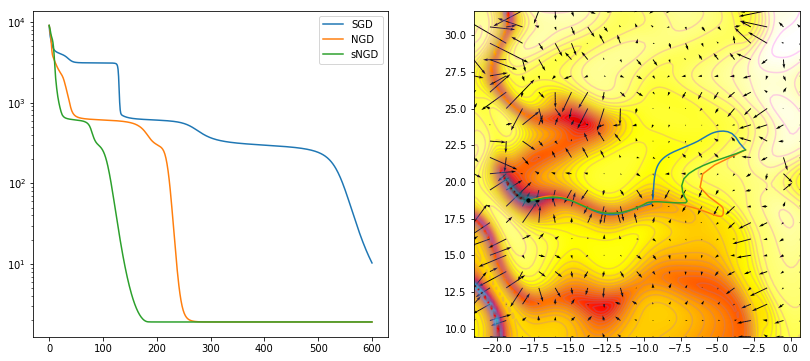

In [19]:
legend = ['SGD', 'NGD', 'sNGD']; 
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.001, 0.01, 0.02])/4

dampings = [0., 60., 0.01]

eps = 0.1
seed = 79320
np.random.randn(1)
w0 = np.array([-3.07841173, 22.1871992])  

l ,w = run_all(iter = 600, OED_solver = 'odeint')

In [20]:
a = np.random.rand(2,2)
b = np.random.rand(2,2,5)
a@ b

array([[[0.887188, 0.593076, 1.317231, 0.939205, 0.815972],
        [0.751016, 0.490933, 1.11581 , 0.794357, 0.69707 ]],

       [[0.471787, 0.557503, 1.2141  , 0.947224, 0.721853],
        [0.390067, 0.470423, 1.026761, 0.798974, 0.604787]]])

w0 =  [-3.078412 22.187199]  lr =  [0.00025 0.0025  0.005  ]  noise =  0.1  seed =  79320


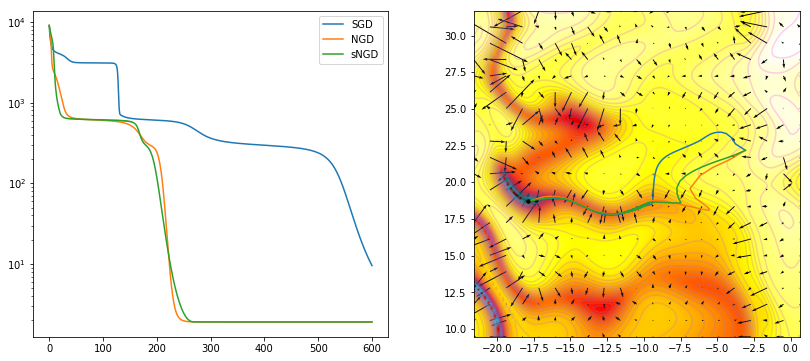

In [21]:
legend = ['SGD', 'NGD', 'sNGD']; 
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.001, 0.01, 0.02])/4

dampings = [0., 60., 0.1]

eps = 0.1
seed = 79320
np.random.randn(1)
w0 = np.array([-3.07841173, 22.1871992])  

l ,w = run_all(iter = 600)

w0 =  [-3.078412 22.187199]  lr =  [0.00025 0.0025  0.005   0.0075 ]  noise =  0.1  seed =  79320


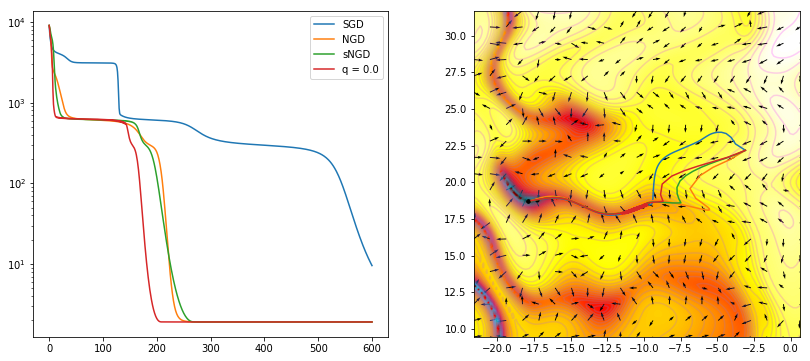

In [22]:
legend = ['SGD', 'NGD', 'sNGD']; 
qs = [0.0, 1.0, 0.50, 0.45]; 
lrs = np.array([0.001, 0.01, 0.02, 0.03])/4

dampings = [0., 60., 0.1, 0]

eps = 0.1
seed = 79320
np.random.randn(1)
w0 = np.array([-3.07841173, 22.1871992])  

l ,w = run_all(iter = 600, idx = 3)

w0 =  [25.093898 17.768443]  lr =  [7.5e-05 2.5e-03 7.5e-03]  noise =  0.1  seed =  65071


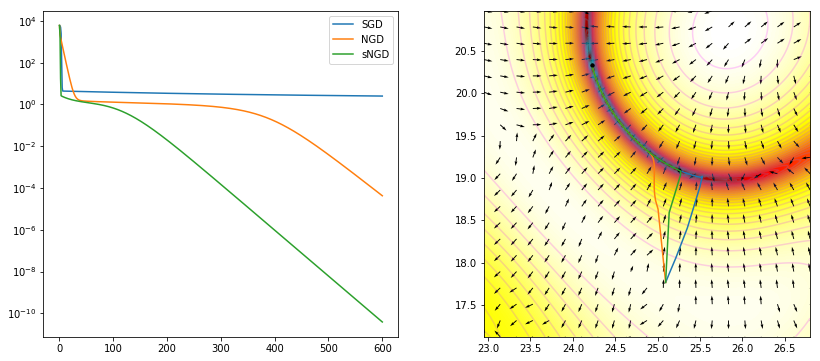

In [23]:
seed = 65071
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.0003, 0.01, 0.03])/4
dampings = [0., 50., 0.01]
w0 = np.array([25.09389783, 17.76844296]) 

l, w = run_all(iter = 600, idx=2)

w0 =  [22.527182  8.971678]  lr =  [0.0005 0.006  0.01  ]  noise =  0.1  seed =  58371


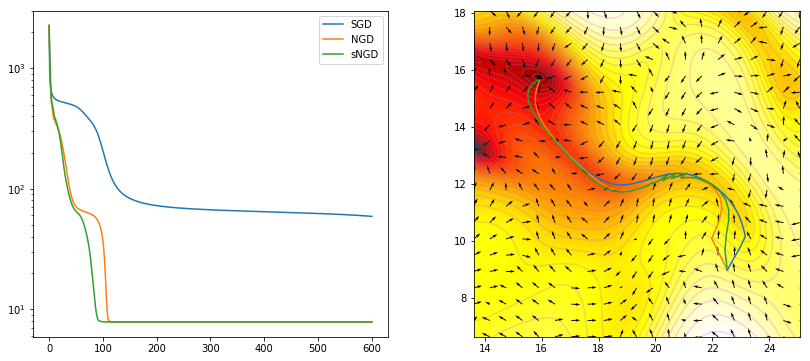

In [24]:
seed = 58371
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.0005, 0.006, 0.01])
dampings = [0., 60., 0.1]

w0 = np.array([22.52718249, 8.97167795]) 

l, w = run_all(iter = 600, idx=2)

w0 =  [0.229358 8.890468]  lr =  [0.0003 0.005  0.0075]  noise =  0.1  seed =  93789


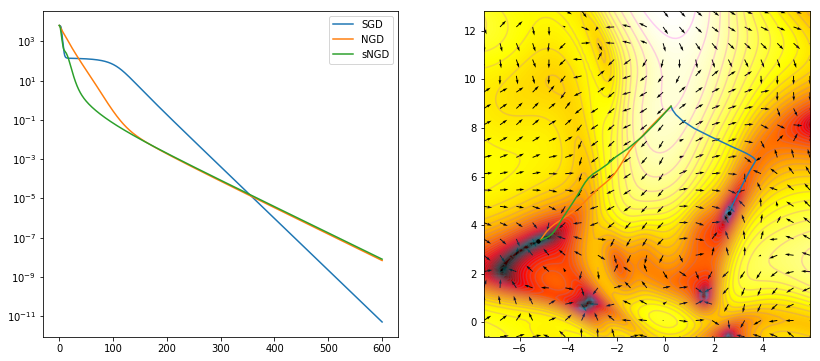

In [25]:
seed = 93789
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.0012, 0.02, 0.03])/4
dampings = [0., 10., 0.1]

w0 = np.array([0.22935811, 8.89046846])

l ,w = run_all(iter = 600, idx=2)

w0 =  [13.457859  9.118802]  lr =  [0.0005 0.005  0.005 ]  noise =  0.1  seed =  30092


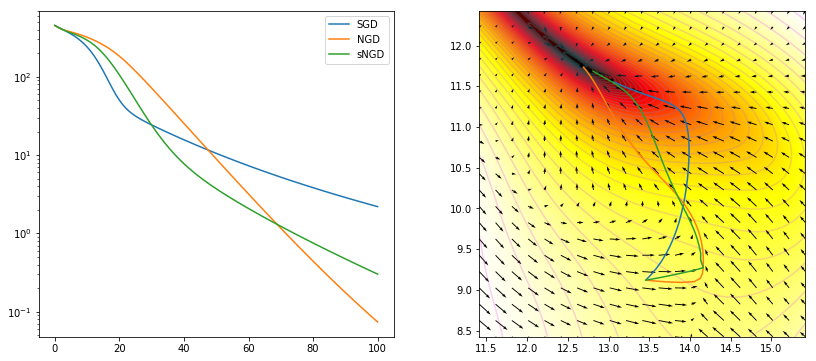

In [26]:
seed = 30092 #int(1e5*np.random.rand(1))
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.002, 0.02, 0.02])/4
dampings = [0., 10., 0.1]
w0 = np.array([13.45785866,  9.1188017])

l, w = run_all (idx = 1)


w0 =  [ 1.       -2.307037]  lr =  [0.0005 0.005  0.005 ]  noise =  0.1  seed =  54780


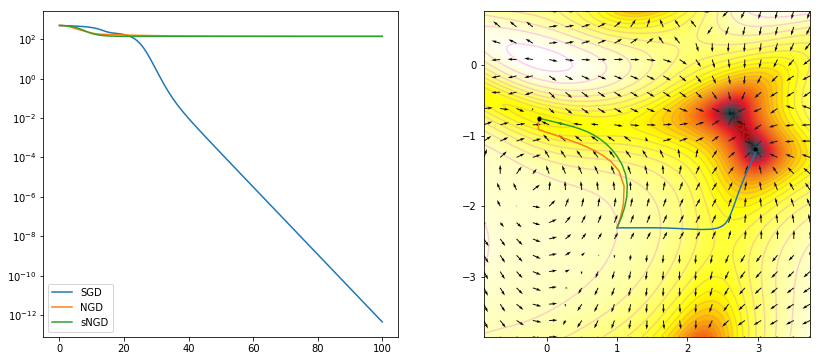

In [27]:
seed = 54780 # int(1e5*np.random.rand(1))
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.002, 0.02, 0.02])/4
dampings = [0., 10., 0.1]
w0 = np.array([1, -2.30703698])

l, w = run_all (idx = 2)

w0 =  [17.5 12.5]  lr =  [0.0005 0.005  0.005 ]  noise =  0.1  seed =  77329


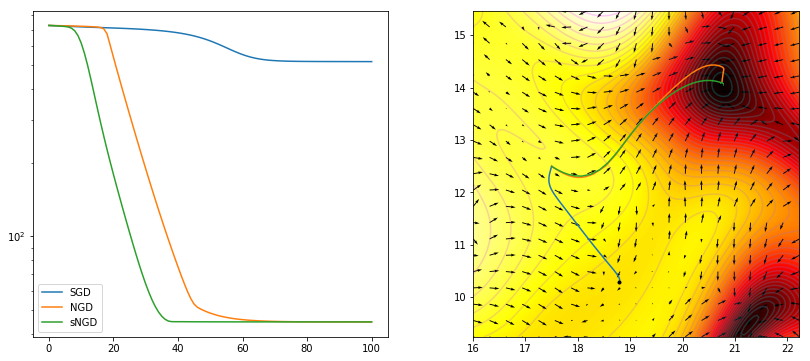

In [28]:
seed = 77329
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.002, 0.02, 0.02])/4
dampings = [0., 10., 0.1]
w0 = np.array([17.5, 12.5])

l, w = run_all (idx = 2)

w0 =  [ 4.8 25.3]  lr =  [0.00025 0.0075  0.01   ]  noise =  0.1  seed =  97639


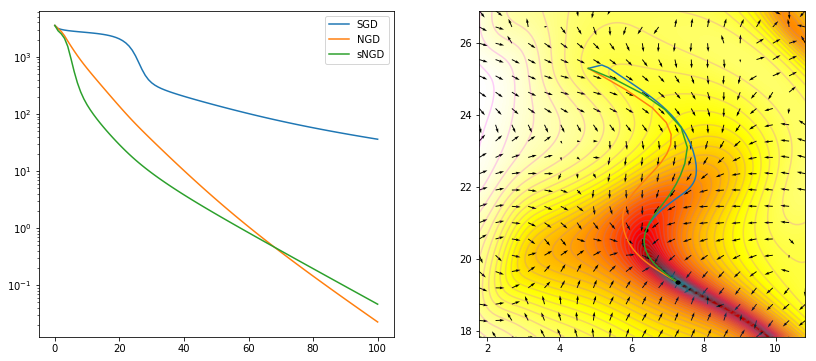

In [29]:
seed =  97639
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.001, 0.03, 0.04])/4
dampings = [0., 10., 0.1]
w0 = np.array([4.8, 25.3])

l, w = run_all (idx = 2)

w0 =  [ 0.53     11.364312]  lr =  [0.00025 0.00125 0.00375]  noise =  0.1  seed =  97639


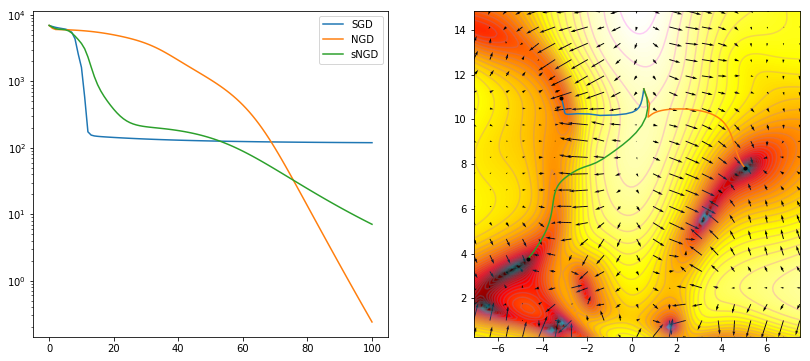

In [30]:
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.002, 0.01, 0.03])/4/2
dampings = [0., 100., 0.]
w0 = np.array([0.53, 11.36431193])

l, w = run_all (eps=0, idx = 0)

w0 =  [ 0.53     11.364312]  lr =  [0.00025 0.00125 0.00375]  noise =  0.1  seed =  97639


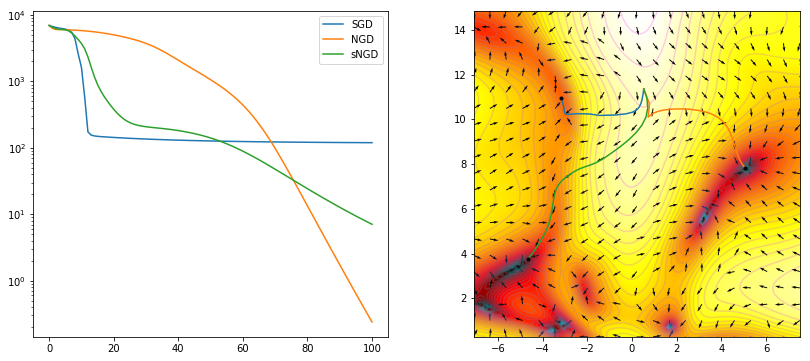

In [31]:
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.002, 0.01, 0.03])/4/2
dampings = [0., 100., 0.]
w0 = np.array([0.53, 11.36431193])

l, w = run_all (eps=0, idx = 2)

w0 =  [-7.44 21.69]  lr =  [0.00025 0.0025  0.005  ]  noise =  0.1  seed =  97639


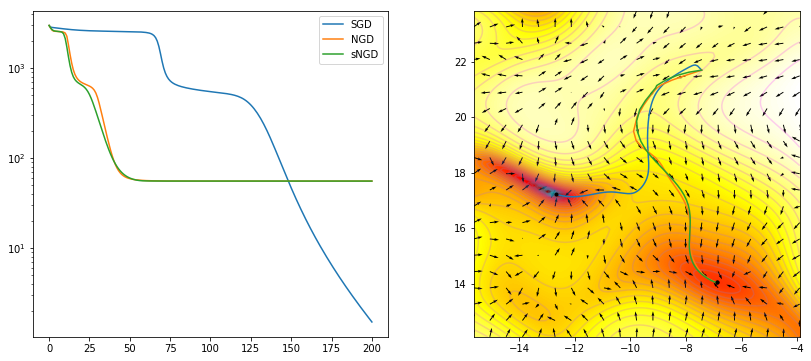

In [32]:
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.001, 0.01, 0.02])/4/1
dampings = [0., 50., 0.5]
w0 = np.array([-7.44, 21.69])

l, w = run_all (eps=0, iter = 200, idx = 2)

w0 =  [13.34 -4.89]  lr =  [0.00025 0.0025  0.005  ]  noise =  0.1  seed =  97639


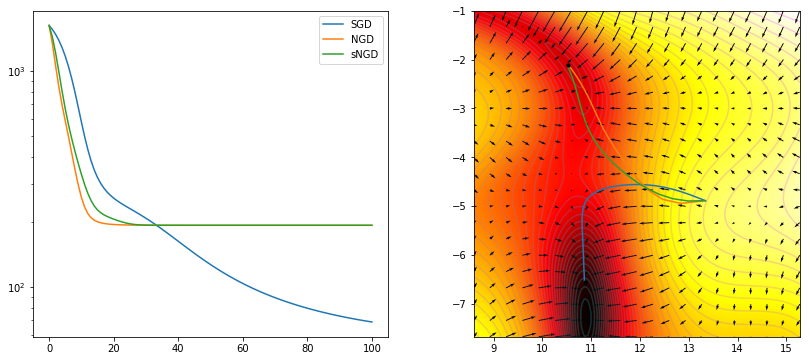

In [33]:
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.001, 0.01, 0.02])/4/1
dampings = [0., 50., 0.5]
w0 = np.array([13.34, -4.89])

l, w = run_all (eps=0, idx = 0)